## Understanding ASR decoders

1. Brief intro on Hidden Markov Model "decoding"
2. Automatic Speech Recognition and Weighted Finite State Transducers 
3. Discussion on decoding

## Hidden Markov Model

### States

* States $s_j \in \mathcal{N}$ here itegers 
* State sequence $\mathbf{s} = [s_1, \dots s_T ] \in \mathcal{R}^T$ 
* $T$ time steps
* $S$ number of states (assumed to be finite) 


## Hidden Markov Model


### Parameters

* Parameters $ \lambda = \{\mathbf{A}, \mathbf{a}, \mathcal{B}  \}$
    * $ \mathbf{A} \in \mathcal{R}^{S \times S} $ transition matrix
        * $ p(s_t = j | s_{t-1} = i) = a_{ij} $ where $a_{ij}$ is the $(i,j)$ element of $\mathbf{A}$ 
        (**Assumption:** _Markov process of order 1_)
    * $ \mathbf{a} \in \mathcal{R}^{S} $ initial state distribution
    * $ \mathcal{B} = \{ b_1, \dots b_S \}$ 
        * $p(y_t | s_j ) = b_{s_j}(y_t)$ (**Assumption:** _Observation independence (memoryless)_)

In [23]:
using HMMBase, Distributions
a = [0.6, 0.4]
A = [0.9 0.1; 0.1 0.9]

B = [Normal(10,0.5), Normal(0,5.0)]
hmm = HMM(a, A, B)

s, o = rand(hmm, 100, seq = true)

## Hidden Markov Model

Given a model obtain observations $\mathbf{y} \in \mathcal{R}^T$



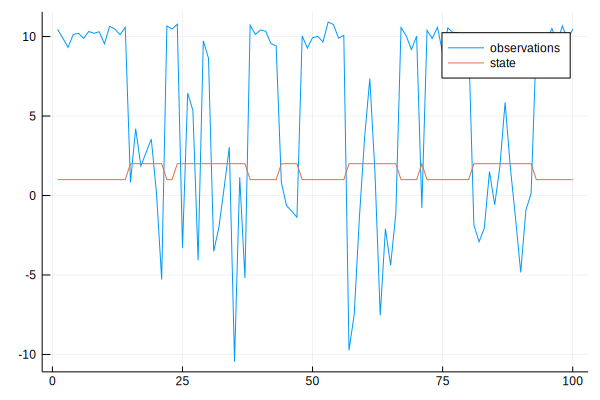

In [24]:
using Plots
plot([o,s], labels=["observations","state"])

## Hidden Markov Model

### Posterior likelihood

Given a HMM $\lambda$ observations $\mathbf{y} \in \mathcal{R}^T$ return state sequence $\mathbf{s}$.

$p_\lambda ( \mathbf{y} ) =  
\sum_{\mathbf{s} \in \mathcal{S}} p_{\lambda} (\mathbf{y} | \mathbf{s} ) p( \mathbf{s} ) $

Computing this is intractable, too many combination of $\mathbf{s}$!



## Hidden Markov Model

### Forward-Backward algorithm

Marginalise $p_\lambda (\mathbf{y})$ at a time $t$:    

$p_\lambda (\mathbf{y}) = \sum_{j = 1}^S p_{\lambda} (\mathbf{y},s_t = j),$

conditional probability definition

$ p_{\lambda} (\mathbf{y},s_t = j) =  
p_{\lambda} (y_1, \dots, y_t, s_t = j) \cdot p_{\lambda} (y_{t+1} \dots o_{T} | y_1, \dots, y_t, s_t = j) 
= \alpha_j(t) \cdot \beta_j(t)
$

$\alpha$ and $\beta$  can be computed using efficient algorithms.

## Hidden Markov Model

### Forward algorithm

$\alpha_t(j) = L_{\lambda} (y_1, \dots, y_t, s_t = j) =  \sum_{i=1}^S \alpha_{t-1}(i) a_{ij} b_j(y_t) $ for $t = 1, \dots, T$, $j = 1, \dots, S$

and set $\alpha_0 (j) = a_j$ for $j = 1, \dots, S$

Similar expression can be obtained for the $\beta_t(j)$ but time reversed.

## Hidden Markov Model

### Viterbi algorithm

Viterbi computes the state sequence with two main differences with respect to the forward algorithm:

1. instead of the sum takes computes the _maximum_ of the previous paths
    * Forward algorithm: $\alpha_j(t) =  L_{\lambda} (o_1, \dots, o_t, s_t = j) = \sum_{i=1}^S \alpha_{t-1}(i) a_{ij} b_j(o_t)$
    * Viterbi algorithm $v_t (j) = \max_{j=1 \dots S} \{ v_{t-1}(i) \} a_{ij} b_j(o_t)$
    
2. keeps track of where these maxima occur, and backtrack the path

## Automatic Speech recognition

* More complex but essentialy use HMM concepts
* Observations audio (MFCCs) $\mathbf{y}$
* **Aim:** recover sequence of words $\mathbf{g}^\star$

$$
\mathbf{g}^\star = \text{argmax}_{\mathbf{g}} p( \mathbf{g} | \mathbf{y}  ) = 
\text{argmax}_{\mathbf{g}} p(\mathbf{y} | \mathbf{g}  )  p(\mathbf{g})
$$

## Automatic Speech recognition

* Words are composed by monophones  $p(\mathbf{y}| \mathbf{g}) = 
\sum_{\mathbf{l}} p(\mathbf{y}| \mathbf{l},\mathbf{g}) p(\mathbf{l} | \mathbf{g})
$

* Context dependent phones $p(\mathbf{y}| \mathbf{l}) =  
\sum_{\mathbf{c}} p(\mathbf{y}| \mathbf{c},\mathbf{l}) p(\mathbf{c} | \mathbf{l})
$ 

* HMM state $p(\mathbf{y}| \mathbf{c}) =  
\sum_{\mathbf{h}} p(\mathbf{y}| \mathbf{s},\mathbf{c}) p(\mathbf{s} | \mathbf{c})
$ 

## Automatic Speech recognition

$$
\mathbf{g}^\star =  
\text{argmax}_{\mathbf{g}} \sum_{\mathbf{l}} \sum_{\mathbf{c}} \sum_{\mathbf{s}}
p(\mathbf{y} | \mathbf{s}  ) p(\mathbf{s} | \mathbf{c}  ) p(\mathbf{c} | \mathbf{l}  ) p(\mathbf{l} | \mathbf{c}  ) p(\mathbf{g})
$$

* This problem can be easily become intractable
* Kaldi use Weighted Finite State transducers (WFST) to make it feasible 

# WFST

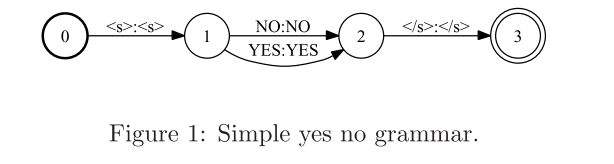

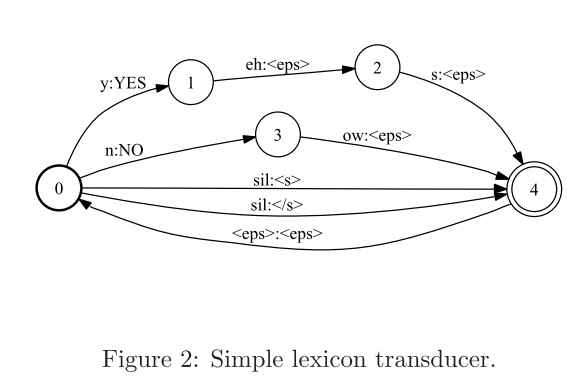

# WFST Composition

$$L \circ G$$
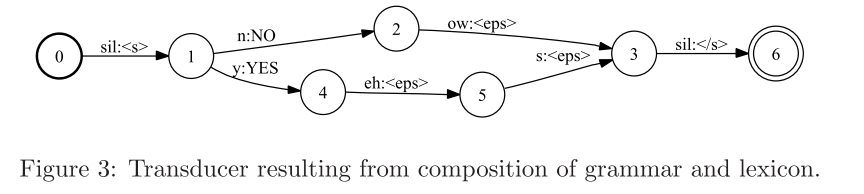


# WFST Composition 

Kaldi builds complete graphs enabling to go from states to words:

$$H \circ C \circ L \circ G$$

* Input labels:  hmm states
* Output labels: words

## Decoding

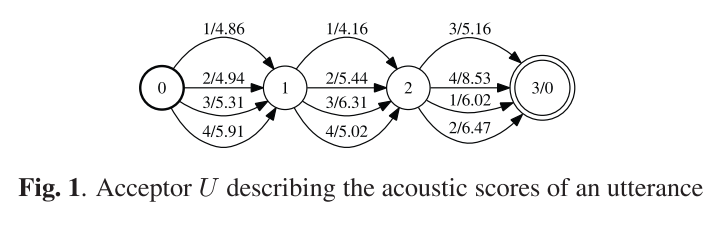

$U$ WFSA has T+1 states, with an arc for each combination of (time, context-dependent HMM state)

* Create: $ S = U \circ HCLG $ input symbols state-level alignment output sentence 
* Decoding -> Find best path in S 

Povey et al. "GENERATING EXACT LATTICES IN THE WFST FRAMEWORK"

## Beam pruning

* Let $B$ be the searched subset of $S$, containing a subset of the states and arcs of S obtained by some heuristic pruning procedure. (?)
* $P = \text{prune}(B, \alpha)$ with beam $\alpha$
* Get lattice $L = \text{prune}(\text{det}(\text{rmeps}(inv(P))),\alpha)$

Povey et al. "GENERATING EXACT LATTICES IN THE WFST FRAMEWORK"

### Lattices in Kaldi

It's a WFTA with:

```bash
[start state id] [end state id] [input & output symbol] [weight]

```
basically store most lilkely word sequeces.

The input/output symbol are word ids and the weight is:
```bash
[graph cost],[acoustic cost],[a string sequence of integers (ali)]
```

Can be used to compute many things like confidences, nbest list and ac reweighting. 